# Data Exploration
Taking a look at the raw dataset that we have.

The `0-Data-Encoder.ipynb` file should have been run before this, and, as a result, the `encoded-data.csv` file should have been generated.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv("../data/encoded-data.csv")
raw_df

,label,hash,dim-00,dim-01,dim-02,dim-03,dim-04,dim-05,dim-06,dim-07,...,dim-22,dim-23,dim-24,dim-25,dim-26,dim-27,dim-28,dim-29,dim-30,dim-31
0,TRICKBOT,f16631469eb35406ef4049d30c763cadda571b25bbdb45...,10.802482,0.0,0.0,0.000000,0.000000,12.707260,9.048082,8.721670,...,0.0,13.428146,0.000000,0.0,0.000000,0.000000,0.801215,10.506460,0.024712,0.138089
1,DARKKOMET,d31a7102cbc54447c251ba62760eb484fd0c9fbb8ea54f...,16.677288,0.0,0.0,0.000000,13.798045,0.000000,3.046454,0.000000,...,0.0,11.214973,0.000000,0.0,0.000000,8.833573,6.818852,0.000000,0.000000,0.000000
2,INSTALLBRAIN,a5ba68828e571de66675befdf4fbaf26dd226e25c2c703...,19.391300,0.0,0.0,0.000000,0.000000,7.920878,12.444473,13.511684,...,0.0,6.118662,0.000000,0.0,0.000000,0.000000,4.542971,7.226212,0.000000,1.421442
3,UNKNOWN,c40861e5ebd3c30de810f33c0959aaf5683586fe819998...,1.521830,0.0,0.0,1.158831,0.561619,5.079783,0.000000,4.686564,...,0.0,4.877486,2.747570,0.0,0.000000,0.000000,0.000000,2.483807,2.246307,0.000000
4,WALDEK,26714e389dbb964ddd764ee4f1bceaf56b18adc8734668...,2.786578,0.0,0.0,0.740827,0.000000,3.454260,2.999919,11.366814,...,0.0,8.534671,1.490412,0.0,0.000000,4.255082,2.657059,2.279361,2.798004,3.320712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,TRICKBOT,9506421d996290f70689559ee0c09cc074c948fff49547...,15.698259,0.0,0.0,0.000000,13.621684,5.317119,0.000000,0.000000,...,0.0,11.855600,0.000000,0.0,0.000000,0.000000,0.000000,3.220627,0.000000,0.000000
1269,NECONYD,0eee965f286f057a3175797590795bbf99fda65dc8d845...,0.000000,0.0,0.0,1.607330,0.000000,0.000000,4.734159,13.946035,...,0.0,2.253247,4.843779,0.0,0.000000,3.935575,7.204690,11.374994,0.000000,0.000000
1270,TRICKBOT,0c6aa0ae05d5fa8bf5a8ea95310be73ee60e55a0ce6864...,6.559162,0.0,0.0,0.000000,0.000000,0.000000,8.169443,9.100674,...,0.0,10.957123,0.000000,0.0,4.151663,6.178845,7.022230,0.000000,0.000000,0.000000
1271,UNKNOWN,08b4e7389242e3b8c37215a3b972f69193a9a12d5130bf...,0.000000,0.0,0.0,0.000000,1.627770,0.871398,0.000000,7.418483,...,0.0,4.741640,3.873108,0.0,0.000000,0.000000,0.000000,0.000000,4.095950,0.103331


What is the distribution of each of the families?

In [3]:
raw_df["label"].value_counts()

label
UNKNOWN         222
TRICKBOT         67
COBALTSTRIKE     48
MIRAI            42
BENIGN           38
               ... 
ROOK              1
BLACKV            1
PISTOLAR          1
GETNOW            1
STEAM             1
Name: count, Length: 302, dtype: int64

Remove the `UNKNOWN` class.

In [4]:
df = raw_df[raw_df["label"] != "UNKNOWN"].reset_index(drop=True)
df

,label,hash,dim-00,dim-01,dim-02,dim-03,dim-04,dim-05,dim-06,dim-07,...,dim-22,dim-23,dim-24,dim-25,dim-26,dim-27,dim-28,dim-29,dim-30,dim-31
0,TRICKBOT,f16631469eb35406ef4049d30c763cadda571b25bbdb45...,10.802482,0.0,0.0,0.000000,0.000000,12.707260,9.048082,8.721670,...,0.0,13.428146,0.000000,0.0,0.000000,0.000000,0.801215,10.506460,0.024712,0.138089
1,DARKKOMET,d31a7102cbc54447c251ba62760eb484fd0c9fbb8ea54f...,16.677288,0.0,0.0,0.000000,13.798045,0.000000,3.046454,0.000000,...,0.0,11.214973,0.000000,0.0,0.000000,8.833573,6.818852,0.000000,0.000000,0.000000
2,INSTALLBRAIN,a5ba68828e571de66675befdf4fbaf26dd226e25c2c703...,19.391300,0.0,0.0,0.000000,0.000000,7.920878,12.444473,13.511684,...,0.0,6.118662,0.000000,0.0,0.000000,0.000000,4.542971,7.226212,0.000000,1.421442
3,WALDEK,26714e389dbb964ddd764ee4f1bceaf56b18adc8734668...,2.786578,0.0,0.0,0.740827,0.000000,3.454260,2.999919,11.366814,...,0.0,8.534671,1.490412,0.0,0.000000,4.255082,2.657059,2.279361,2.798004,3.320712
4,ECHELON,5b3f895f7fc0f82147f36989f7c007dc73ea30297d2a53...,5.662738,0.0,0.0,0.000000,0.000000,2.736393,1.493553,12.439167,...,0.0,8.915607,0.000000,0.0,0.000000,1.668095,0.342526,2.664560,7.784793,6.317613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,STEAM,60f2ab502f2809fa7e33e43905c5b9e77080d4cf5d1f28...,9.156627,0.0,0.0,0.000000,0.000000,3.912453,0.591176,9.764282,...,0.0,11.173216,0.000000,0.0,0.000000,0.000000,0.000000,4.251192,7.529343,4.817098
1047,TRICKBOT,9506421d996290f70689559ee0c09cc074c948fff49547...,15.698259,0.0,0.0,0.000000,13.621684,5.317119,0.000000,0.000000,...,0.0,11.855600,0.000000,0.0,0.000000,0.000000,0.000000,3.220627,0.000000,0.000000
1048,NECONYD,0eee965f286f057a3175797590795bbf99fda65dc8d845...,0.000000,0.0,0.0,1.607330,0.000000,0.000000,4.734159,13.946035,...,0.0,2.253247,4.843779,0.0,0.000000,3.935575,7.204690,11.374994,0.000000,0.000000
1049,TRICKBOT,0c6aa0ae05d5fa8bf5a8ea95310be73ee60e55a0ce6864...,6.559162,0.0,0.0,0.000000,0.000000,0.000000,8.169443,9.100674,...,0.0,10.957123,0.000000,0.0,4.151663,6.178845,7.022230,0.000000,0.000000,0.000000


Keep only the samples whose label have at least `KEEP_THRESHOLD` occurences.

In [5]:
KEEP_THRESHOLD = 5

counts = df["label"].value_counts(dropna=False) 
keep_labels = counts[counts >= KEEP_THRESHOLD].index
df = df[df["label"].isin(keep_labels)].reset_index(drop=True)
df

,label,hash,dim-00,dim-01,dim-02,dim-03,dim-04,dim-05,dim-06,dim-07,...,dim-22,dim-23,dim-24,dim-25,dim-26,dim-27,dim-28,dim-29,dim-30,dim-31
0,TRICKBOT,f16631469eb35406ef4049d30c763cadda571b25bbdb45...,10.802482,0.0,0.0,0.000000,0.000000,12.707260,9.048082,8.721670,...,0.0,13.428146,0.000000,0.0,0.000000,0.000000,0.801215,10.506460,0.024712,0.138089
1,DARKKOMET,d31a7102cbc54447c251ba62760eb484fd0c9fbb8ea54f...,16.677288,0.0,0.0,0.000000,13.798045,0.000000,3.046454,0.000000,...,0.0,11.214973,0.000000,0.0,0.000000,8.833573,6.818852,0.000000,0.000000,0.000000
2,HIVE,122e397dc3a55143bd276d6ff3bc04a05601fbf390aa52...,0.000000,0.0,0.0,6.604103,2.193231,4.128004,2.006744,6.526801,...,0.0,2.912180,10.735530,0.0,0.000000,0.774567,5.789243,0.877978,0.000000,0.000000
3,AGENTB,b390756adcaa12f5abf6c97174d376027a85efd7606ee5...,0.000000,0.0,0.0,6.962211,1.492272,0.000000,6.867857,9.931770,...,0.0,0.000000,16.229820,0.0,0.000000,2.684118,14.063266,8.427286,0.000000,0.000000
4,RELINE,f4580de8ed4b87729112d8e7779926905ae7b859dbe4ec...,4.586922,0.0,0.0,0.000000,0.000000,6.750409,0.000000,11.644707,...,0.0,13.045745,0.000000,0.0,0.000000,0.806817,0.000000,2.727366,6.296984,4.032376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,FARFLI,de965e33dff58cf011106feacef2f804d9e35d00b8b5ff...,3.101174,0.0,0.0,3.244083,0.000000,6.665556,0.000000,13.080181,...,0.0,6.186675,6.110146,0.0,0.000000,0.000000,0.000000,0.058109,0.000000,0.000000
664,TRICKBOT,9506421d996290f70689559ee0c09cc074c948fff49547...,15.698259,0.0,0.0,0.000000,13.621684,5.317119,0.000000,0.000000,...,0.0,11.855600,0.000000,0.0,0.000000,0.000000,0.000000,3.220627,0.000000,0.000000
665,NECONYD,0eee965f286f057a3175797590795bbf99fda65dc8d845...,0.000000,0.0,0.0,1.607330,0.000000,0.000000,4.734159,13.946035,...,0.0,2.253247,4.843779,0.0,0.000000,3.935575,7.204690,11.374994,0.000000,0.000000
666,TRICKBOT,0c6aa0ae05d5fa8bf5a8ea95310be73ee60e55a0ce6864...,6.559162,0.0,0.0,0.000000,0.000000,0.000000,8.169443,9.100674,...,0.0,10.957123,0.000000,0.0,4.151663,6.178845,7.022230,0.000000,0.000000,0.000000


What is the distribution of classes now?

<Axes: xlabel='count', ylabel='label'>

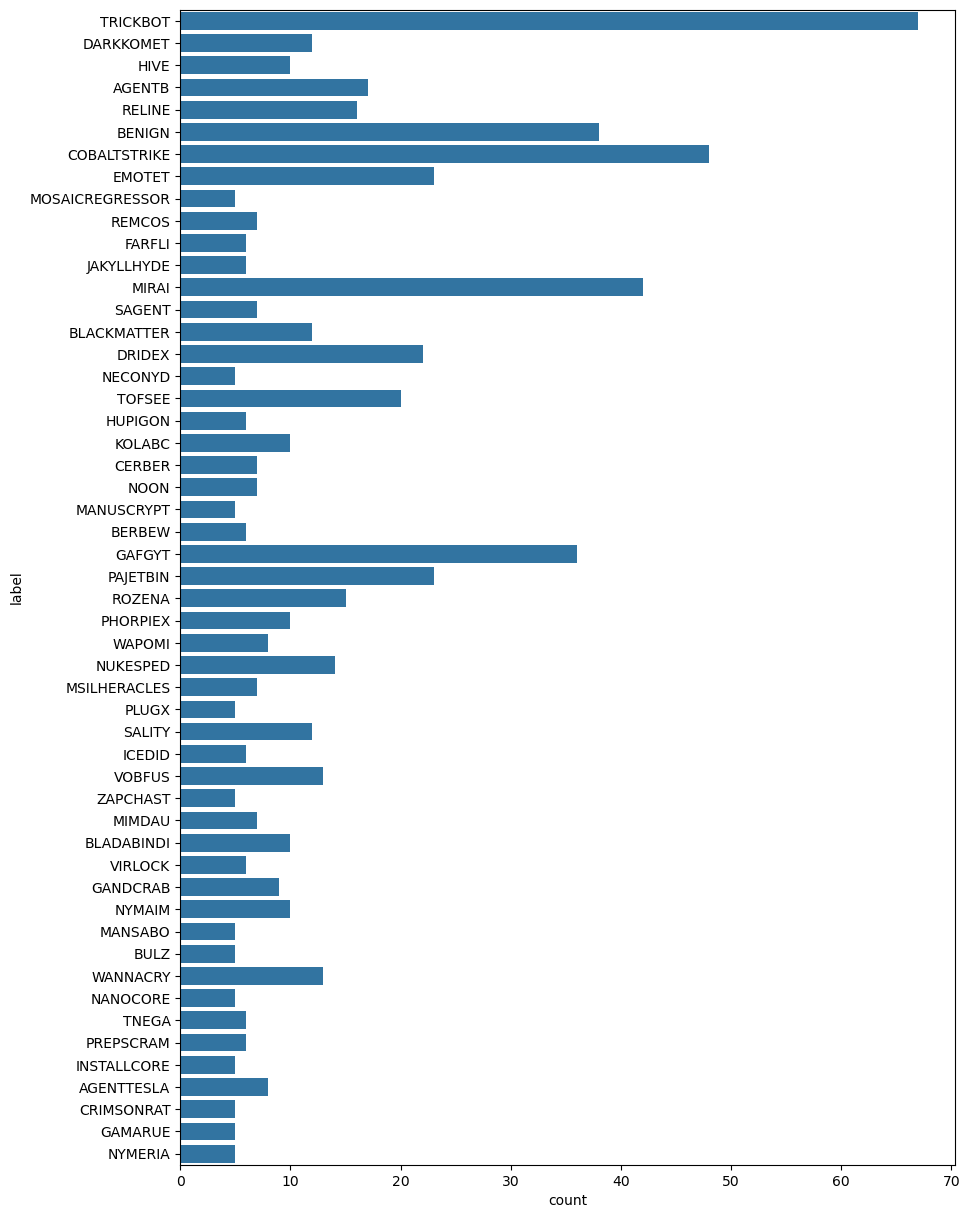

In [6]:
plt.figure(figsize = (10, 15))
sns.countplot(data=df["label"])

Save the updated data.

In [7]:
df.to_csv("../data/processed-data.csv", index=False)